<a href="https://colab.research.google.com/github/adarshm11/earthquakes-analysis/blob/main/CS_131_Earthquakes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necessary libraries

In [1]:
!pip install pandas numpy matplotlib seaborn folium


# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
import folium

# Store the cleaned dataset into a Pandas Dataframe

In [3]:
file_path = '/content/drive/MyDrive/kaggle/cleaned_earthquakes_data.csv'

df = pd.read_csv(file_path)

# Unit Tests to ensure there are no empty cells in the cleaned dataset

In [4]:
import unittest
import os

class TestDataFrame(unittest.TestCase):

    def setUp(self):
        self.file_path = '/content/drive/MyDrive/kaggle/cleaned_earthquakes_data.csv'
        try:
            self.df = pd.read_csv(self.file_path)
        except FileNotFoundError:
            self.fail(f"File not found: {self.file_path}.  Make sure the file exists and the path is correct.")

    def test_no_empty_cells(self):
        columns_to_check = ['magnitude', 'date', 'time', 'felt', 'tsunami', 'latitude', 'longitude', 'location']
        for col in columns_to_check:
            self.assertFalse(self.df[col].isnull().values.any(), f"Column '{col}' contains empty cells.")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.059s

OK


# Visualizing the top 20 magnitude Earthquakes


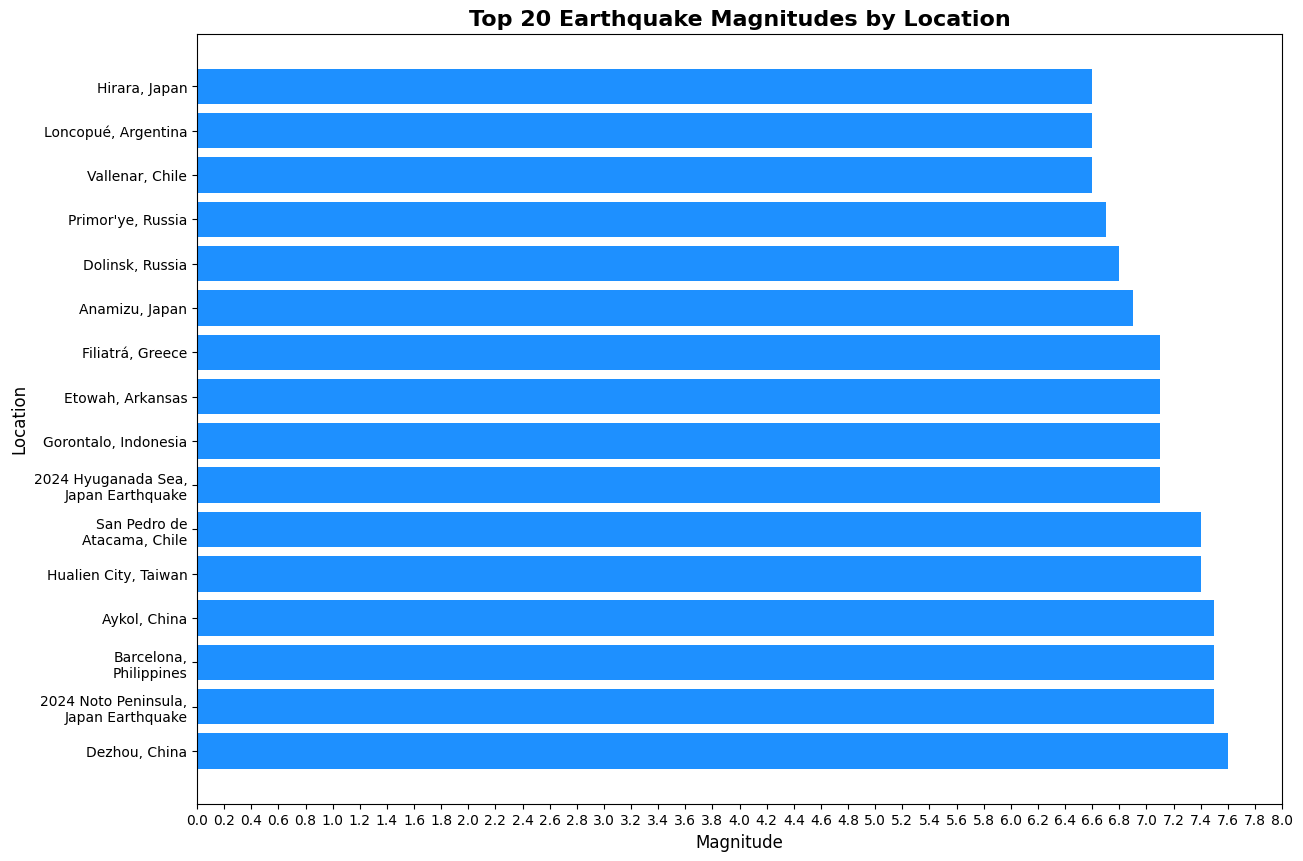

In [5]:
top_20 = df.nlargest(20, 'magnitude')

# Extract 'location' and 'magnitude' columns
locations = top_20['location']
magnitudes = top_20['magnitude']

# Function to wrap long location names
def wrap_labels(labels, width=20):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Wrap the location labels if they are long
wrapped_locations = wrap_labels(locations)

# Create the figure with more height to prevent clustering
plt.figure(figsize=(14, 10))

# Create a horizontal bar plot
plt.barh(wrapped_locations, magnitudes, color='dodgerblue')

plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Top 20 Earthquake Magnitudes by Location', fontsize=16, weight='bold')

plt.xticks(np.arange(0, 8.2, 0.2))

# Show the plot
plt.show()



# Scatter plots for Magnitude vs Latitude/Longitude

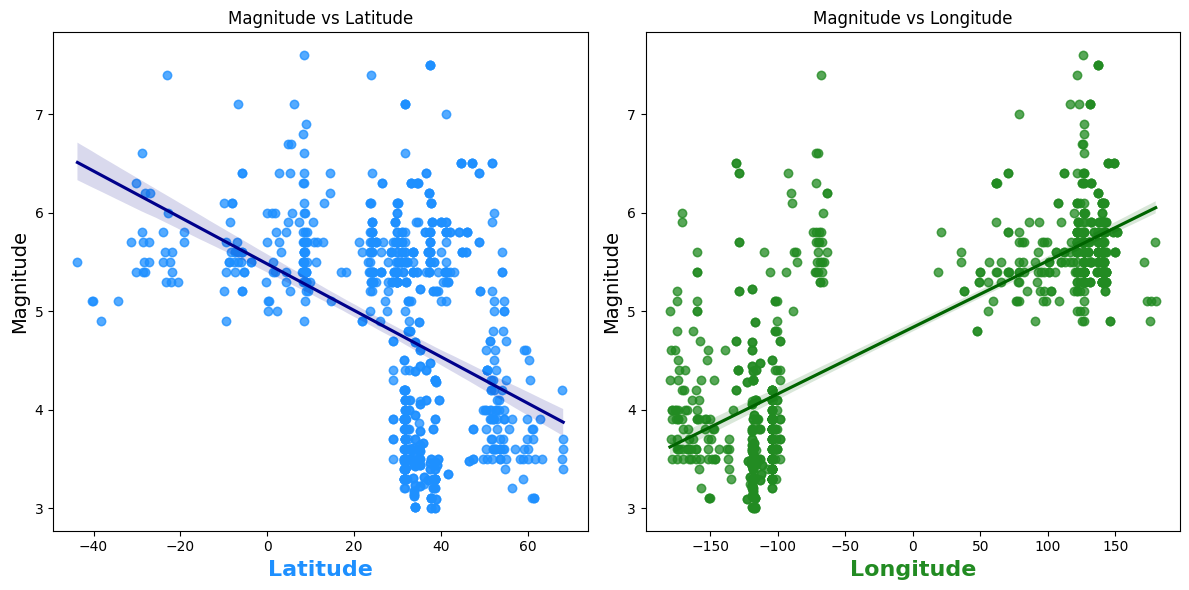

In [6]:
plt.figure(figsize=(12, 6))

# Magnitude vs Latitude
plt.subplot(1, 2, 1)
plt.scatter(df['latitude'], df['magnitude'], alpha=0.5, c='dodgerblue')
sns.regplot(x='latitude', y='magnitude', data=df, scatter_kws={'alpha':0.5, 'color':'dodgerblue'}, line_kws={'color':'darkblue'})
plt.xlabel('Latitude', c='dodgerblue', weight='bold', fontsize=16)
plt.ylabel('Magnitude', fontsize=14)
plt.title('Magnitude vs Latitude')

# Magnitude vs Longitude
plt.subplot(1, 2, 2)
plt.scatter(df['longitude'], df['magnitude'], alpha=0.5, c='forestgreen')
sns.regplot(x='longitude', y='magnitude', data=df, scatter_kws={'alpha':0.5, 'color':'forestgreen'}, line_kws={'color':'darkgreen'})
plt.xlabel('Longitude', c='forestgreen', weight='bold', fontsize=16)
plt.ylabel('Magnitude', fontsize=14)
plt.title('Magnitude vs Longitude')

plt.tight_layout()
plt.show()



# Heatmap to show similar correlation

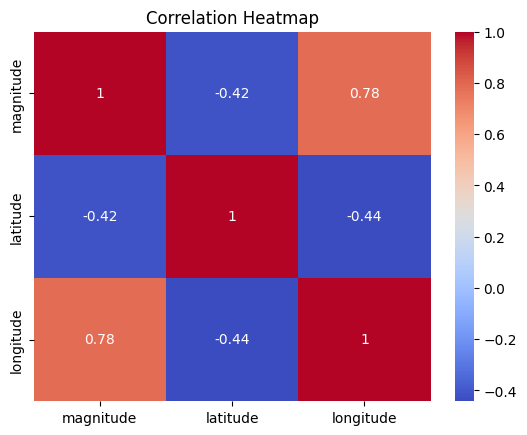

In [7]:
correlation_matrix = df[['magnitude', 'latitude', 'longitude']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Top 10 locations with highest Earthquake frequency

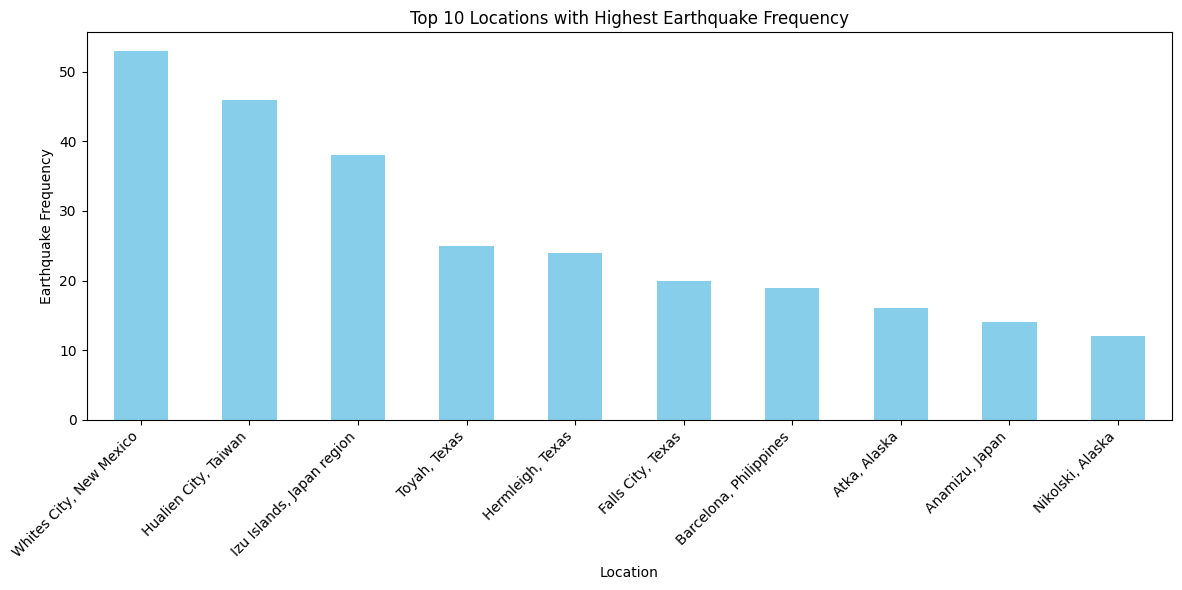

In [8]:
location_counts = df['location'].value_counts()

top_10_locations = location_counts.head(10)

plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Earthquake Frequency')
plt.title('Top 10 Locations with Highest Earthquake Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Finding Earthquake trends in 2023-2024

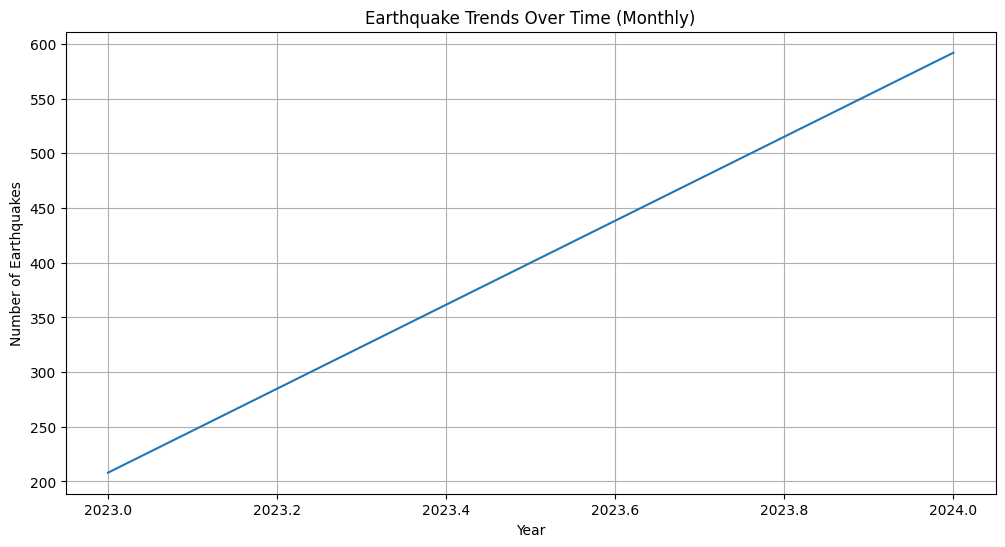

In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

earthquakes_per_year = df.groupby('year')['magnitude'].count()
plt.figure(figsize=(12, 6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Trends Over Time (Monthly)')
plt.grid(True)
plt.show()



# Comparing the number of Earthquakes in the morning and night

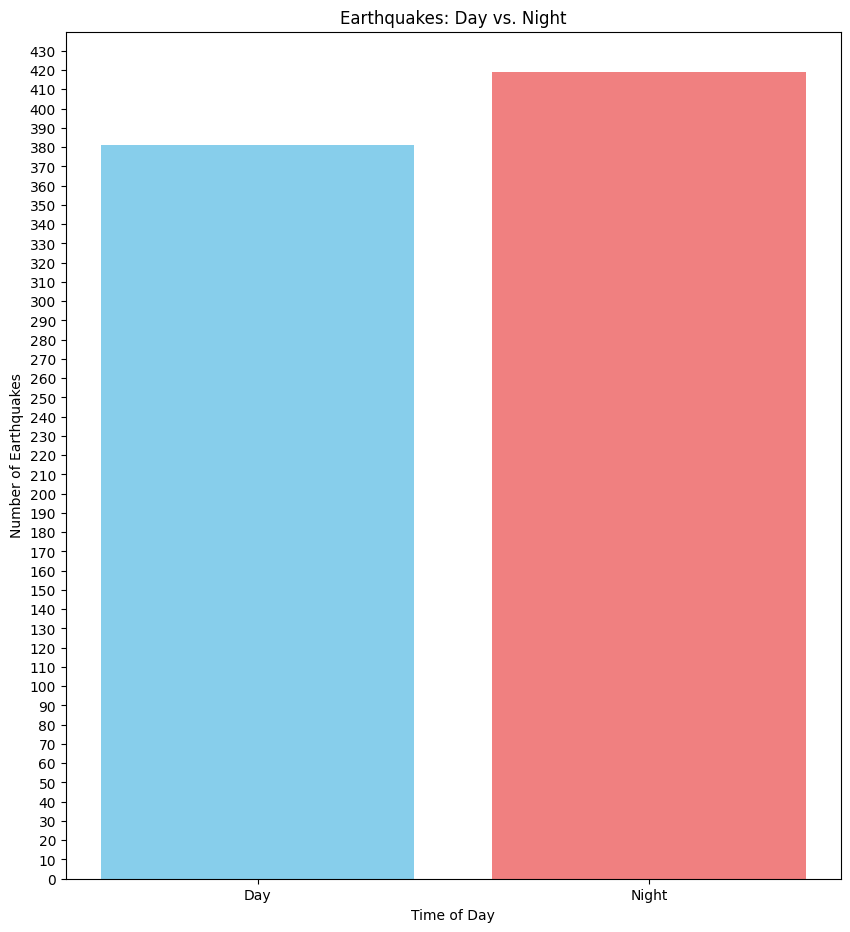

In [10]:
df['date'] = pd.to_datetime(df['time'], unit='ms')

df['hour'] = df['date'].dt.hour

df['day_night'] = 'Night'
df.loc[(df['hour'] >= 6) & (df['hour'] < 18), 'day_night'] = 'Day'

day_night_counts = df['day_night'].value_counts()
day_night_counts = day_night_counts.reindex(['Day', 'Night'])

plt.figure(figsize=(10, 11))
plt.bar(day_night_counts.index, day_night_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel('Time of Day')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes: Day vs. Night')

y_max = day_night_counts.max()
plt.yticks(range(0, y_max + 20, 10))
plt.show()

# Global map to show physical locations (latitude and longitude) of Earthquakes

In [11]:
m = folium.Map(location=[0, 0], zoom_start=2)

for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['magnitude'] * 2,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Magnitude: {row['magnitude']}, Depth: {row['depth'] if 'depth' in df.columns else 'Not available'}"
    ).add_to(m)


# Display the map
m